<a href="https://colab.research.google.com/github/BHill96/On_the_Variable_Annuity_Holders_Lapse_Utility/blob/master/On_Annuity_Lapse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First we download the code and data used in the paper.

In [0]:
! git clone https://github.com/BHill96/On_the_Variable_Annuity_Holders_Lapse_Utility.git

Cloning into 'On_the_Variable_Annuity_Holders_Lapse_Utility'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 14 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (14/14), done.


Move into the repo directory.

In [0]:
cd On_the_Variable_Annuity_Holders_Lapse_Utility

/content/On_the_Variable_Annuity_Holders_Lapse_Utility


Create directory for figures.

In [0]:
mkdir figs

Download necessary packages.

In [0]:
import Gompertz as GMP
import LapsePredictor as LP
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Load in the data.

In [0]:
data = pd.read_excel('DeathProbability.xlsx', sheet_name='Surv', header=[0,1])
data = data.rename({'Unnamed: 0_level_0':'Unnamed'}, axis=1)
dataRange = [data.columns[-1][0], data.columns[1][0]]
dataRange = list(range(dataRange[0], dataRange[1]+1))
# These years are not in the data
dataRange.remove(2008)
dataRange.remove(2012)

# Gompertz


## Male
First we use the male data to tune gompertz.

In [0]:
sex = 'Male'
T = [0, 3, 20, 25, 40, 55]
tMax = T[5]-T[2]
x = 65
dt = 1

mortResults = []
for year in dataRange:
    bVals, mList = GMP.Tune_M(survRates=data[year][sex], ages=data['Unnamed']['Age'], tMax=tMax, maxB=10, step=1)
    params = pd.DataFrame(bVals, index=mList, columns=data['Unnamed']['Age']).apply(np.mean, axis=1)
    (e, m, b) = GMP.optimal_M_B(survRates=data[year][sex], ages=data['Unnamed']['Age'], params=params, minAge=x, dt=dt, P=1)
    mortResults.append([m,b,e])

mortResults = pd.DataFrame(mortResults, columns=['m','b','error'], index=dataRange)
mortResults

/content/On_the_Variable_Annuity_Holders_Lapse_Utility/Gompertz.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  total.append((x-m)/log(log(p)/(1-exp(t/b))))
/content/On_the_Variable_Annuity_Holders_Lapse_Utility/Gompertz.py:20: RuntimeWarning: divide by zero encountered in log
  total.append((x-m)/log(log(p)/(1-exp(t/b))))


,m,b,error
2004,109.52381,9.0,0.051136
2005,109.52381,9.0,0.049774
2006,109.52381,9.0,0.049303
2007,109.52381,9.0,0.050611
2009,109.52381,9.0,0.051084
2010,109.52381,9.0,0.050214
2011,109.52381,9.0,0.049672
2013,109.52381,9.0,0.050391
2014,109.52381,9.0,0.051159
2015,109.52381,9.0,0.049430


Year: 2004
Error: 0.0511364833975804



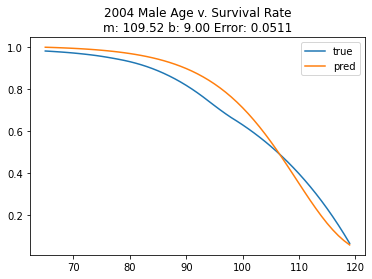

Year: 2005
Error: 0.04977409900056141



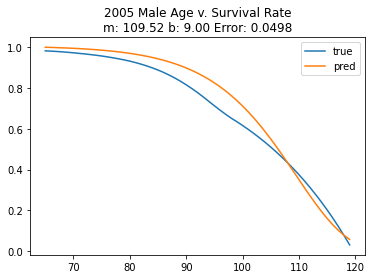

Year: 2006
Error: 0.049302683397580406



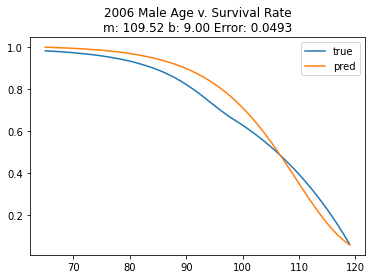

Year: 2007
Error: 0.05061091206596706



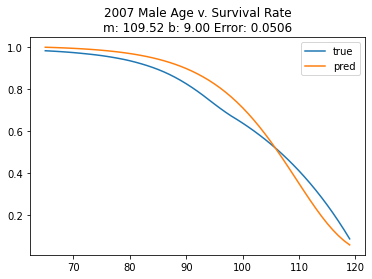

Year: 2009
Error: 0.051084112065967045



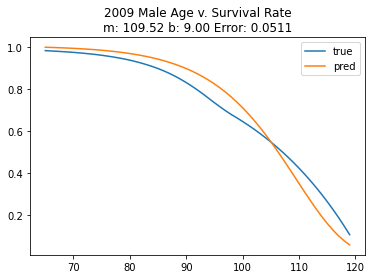

Year: 2010
Error: 0.0502140575205125



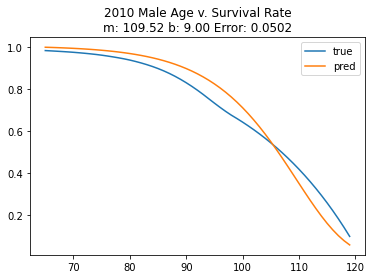

Year: 2011
Error: 0.04967202115687613



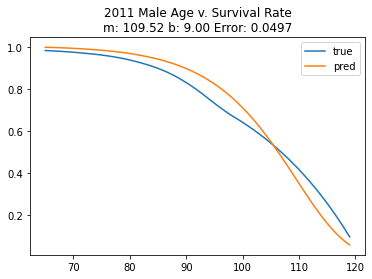

Year: 2013
Error: 0.05039093024778524



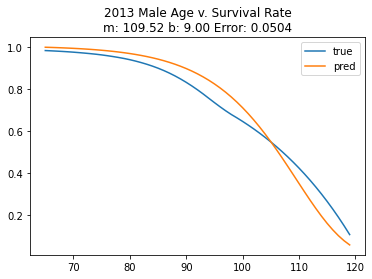

Year: 2014
Error: 0.051158855045005586



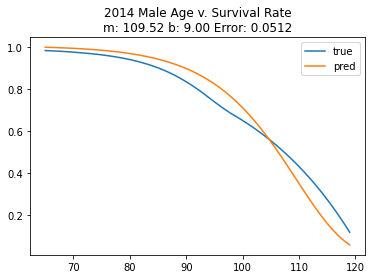

Year: 2015
Error: 0.04943027570233069



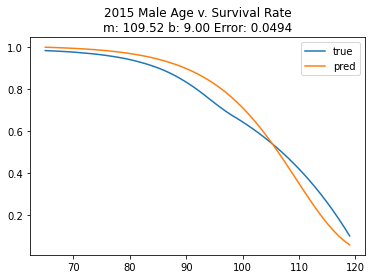

Year: 2016
Error: 0.04979840049955103



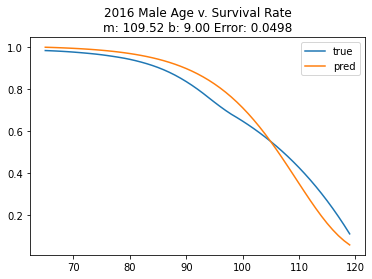

Average error: 0.05023389364542886


In [0]:
# Display survival graph with optimal parameters compared to actual data
numAges = len(data['Unnamed']['Age'])
for year in mortResults.index:
    yearData = mortResults.loc[year]
    survProbs = [1-GMP.gompertz(k, dt, 65, yearData.m, yearData.b) for k in range(0, numAges)]
    print('Year: {0}\nError: {1}\n'.format(year, yearData.error))
    plt.plot(data['Unnamed']['Age'], data[year][sex], label='true')
    plt.plot(data['Unnamed']['Age'], survProbs, label='pred')
    plt.legend()
    plt.title(str(year)+' '+sex+' Age v. Survival Rate\nm: {0:.2f} b: {1:.2f} Error: {2:.3}'.format(yearData.m,yearData.b,yearData.error))
    plt.savefig('figs/{0}_{1}_Public_Mort.pdf'.format(year, sex))
    plt.show()

print('Average error: {0}'.format(mortResults.error.mean()))

We use these parameters for the rest of the male simulations.

In [0]:
row = mortResults.iloc[-1]
print('Error: {0}\nm:     {1}\nb:     {2}'.format(row.error, row.m, row.b))

Error: 0.04979840049955103
m:     109.52380952380952
b:     9.0


## Female



In [0]:
sex = 'Female'
T = [0, 3, 20, 25, 40, 55]
tMax = T[5]-T[2]
x = 65
dt = 1

mortResults = []
for year in dataRange:
    bVals, mList = GMP.Tune_M(survRates=data[year][sex], ages=data['Unnamed']['Age'], tMax=tMax, maxB=10, step=1)
    params = pd.DataFrame(bVals, index=mList, columns=data['Unnamed']['Age']).apply(np.mean, axis=1)
    (e, m, b) = GMP.optimal_M_B(survRates=data[year][sex], ages=data['Unnamed']['Age'], params=params, minAge=x, dt=dt, P=1)
    mortResults.append([m,b,e])

mortResults = pd.DataFrame(mortResults, columns=['m','b','error'], index=dataRange)
mortResults

/content/On_the_Variable_Annuity_Holders_Lapse_Utility/Gompertz.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  total.append((x-m)/log(log(p)/(1-exp(t/b))))
/content/On_the_Variable_Annuity_Holders_Lapse_Utility/Gompertz.py:20: RuntimeWarning: divide by zero encountered in log
  total.append((x-m)/log(log(p)/(1-exp(t/b))))


,m,b,error
2004,109.523810,9.0,0.035249
2005,109.523810,9.0,0.032387
2006,109.523810,9.0,0.033837
2007,109.523810,9.0,0.036423
2009,112.142857,9.0,0.034104
2010,112.142857,9.0,0.034612
2011,112.142857,9.0,0.035618
2013,112.142857,9.0,0.034338
2014,112.142857,9.0,0.033730
2015,112.142857,9.0,0.035018


Year: 2004
Error: 0.03524911391018329



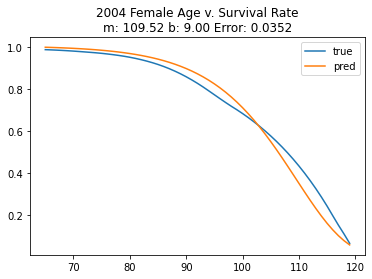

Year: 2005
Error: 0.032387365427055885



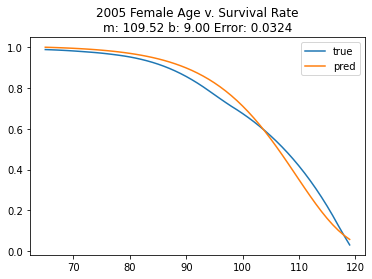

Year: 2006
Error: 0.03383705936472876



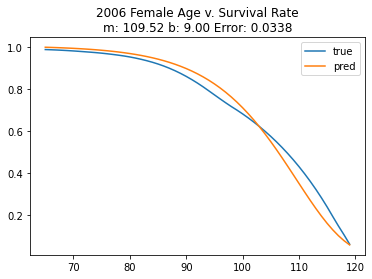

Year: 2007
Error: 0.03642293209200148



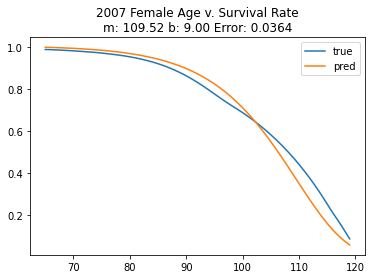

Year: 2009
Error: 0.034103532526331005



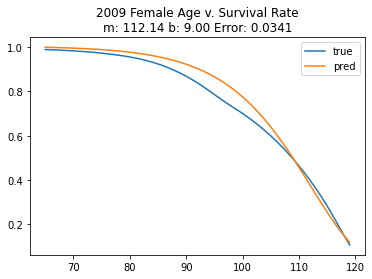

Year: 2010
Error: 0.03461222894998823



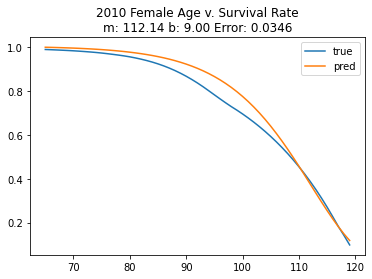

Year: 2011
Error: 0.035618487313153036



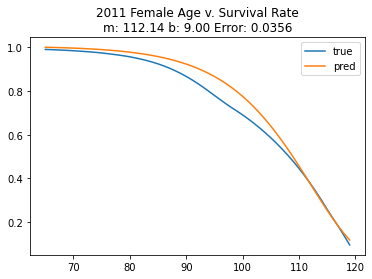

Year: 2013
Error: 0.034337746246705526



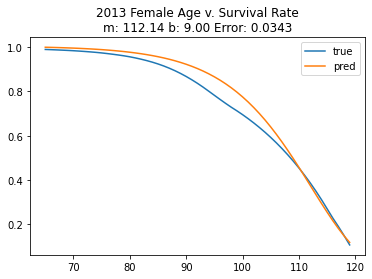

Year: 2014
Error: 0.03372999416436054



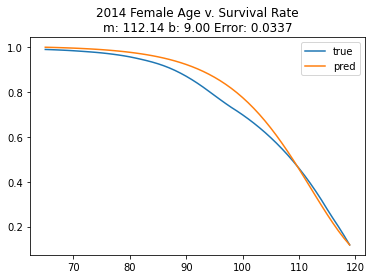

Year: 2015
Error: 0.0350179842140026



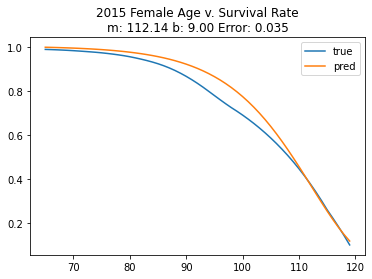

Year: 2016
Error: 0.033462896162694634



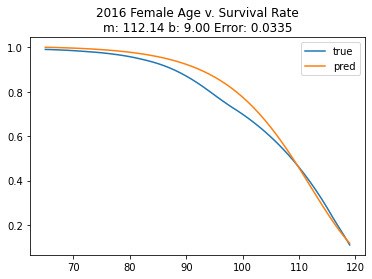

Average error: 0.034434485488291366


In [0]:
# Display survival graph with optimal parameters compared to actual data
numAges = len(data['Unnamed']['Age'])
for year in mortResults.index:
    yearData = mortResults.loc[year]
    survProbs = [1-GMP.gompertz(k, dt, 65, yearData.m, yearData.b) for k in range(0, numAges)]
    print('Year: {0}\nError: {1}\n'.format(year, yearData.error))
    plt.plot(data['Unnamed']['Age'], data[year][sex], label='true')
    plt.plot(data['Unnamed']['Age'], survProbs, label='pred')
    plt.legend()
    plt.title(str(year)+' '+sex+' Age v. Survival Rate\nm: {0:.2f} b: {1:.2f} Error: {2:.3}'.format(yearData.m,yearData.b,yearData.error))
    plt.savefig('figs/{0}_{1}_Public_Mort.pdf'.format(year, sex))
    plt.show()

print('Average error: {0}'.format(mortResults.error.mean()))

We use these parameters for the rest of the female simulations.

In [0]:
row = mortResults.iloc[-1]
print('Error: {0}\nm:     {1}\nb:     {2}'.format(row.error, row.m, row.b))

Error: 0.033462896162694634
m:     112.14285714285714
b:     9.0


# Utility Functions

In [0]:
deltaT = 1/12
alpha = 0.3
rho = (1+0.015)**(1/12)-1
S0 = 100000
mu = (1+0.08)**(1/12)-1
sigma = 0.15/np.sqrt(12)
S2 = S0*np.exp(alpha*(mu-0.5*(sigma**2))*(T[2]/deltaT)+(alpha**2)*(sigma**2)*(T[2]/deltaT)/2)

Male

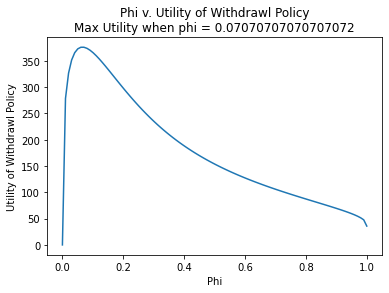

CPU times: user 248 ms, sys: 7.95 ms, total: 256 ms
Wall time: 255 ms


In [0]:
%%time
graphName = 'figs/Male_Public_Utility.pdf'
m = 109.52380952380952
b = 9.0
# m, b and x are found earlier
q = LP.payoutRatio(S0, alpha, mu, sigma, T[2]/deltaT, T[2], T[5], deltaT, rho, GMP.gompertz, m, x, b, 1)
LP.plotUtilityWithdrawl(GMP.gompertz,x=x,m=m,b=b,T=T, deltaT=dt, alpha=alpha, S2=S2, mu=mu, sigma=sigma, rho=rho, q=q, figName=graphName, 
                        numSteps=100)

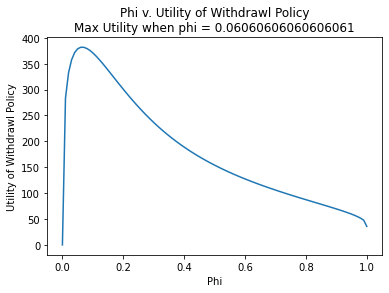

CPU times: user 235 ms, sys: 16.1 ms, total: 251 ms
Wall time: 250 ms


In [0]:
%%time
graphName = 'figs/Female_Public_Utility.pdf'
m = 112.14285714285714
b = 9.0
# m, b and x are found earlier
q = LP.payoutRatio(S0, alpha, mu, sigma, T[2]/deltaT, T[2], T[5], deltaT, rho, GMP.gompertz, m, x, b, 1)
LP.plotUtilityWithdrawl(GMP.gompertz,x=x,m=m,b=b,T=T, deltaT=dt, alpha=alpha, S2=S2, mu=mu, sigma=sigma, rho=rho, q=q, figName=graphName, 
                        numSteps=100)

# Lapse Prediction
Male

Adjusted search range to (100000,1200000)


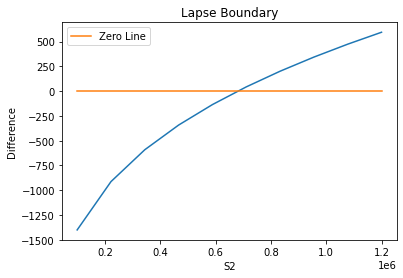

q = 0.144855397892653
intersection at: $680143
Probability of Lapse at 0.18635876416487696
CPU times: user 25.6 s, sys: 7.69 ms, total: 25.6 s
Wall time: 25.6 s


In [0]:
%%time
m = 109.52380952380952
b = 9.0
LP.lapseBoundaryFinder(GMP.gompertz, x, m, b, T, deltaT, alpha, rho, S0, mu, sigma, q, fileName='figs/Male_AIG_LapseBoundary.pdf')

Female

Adjusted search range to (100000,1200000)


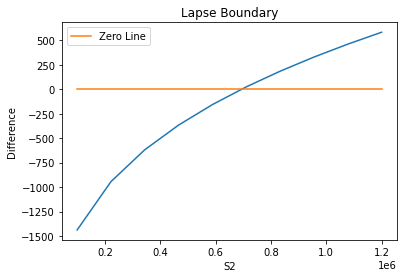

q = 0.144855397892653
intersection at: $693811
Probability of Lapse at 0.17851097331016463
CPU times: user 25.3 s, sys: 11.7 ms, total: 25.3 s
Wall time: 25.3 s


In [0]:
%%time
m = 112.14285714285714
b = 9.0
LP.lapseBoundaryFinder(GMP.gompertz, x, m, b, T, deltaT, alpha, rho, S0, mu, sigma, q, fileName='figs/Female_AIG_LapseBoundary.pdf')